In [2]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Cargar el conjunto de datos
housing = fetch_california_housing()

In [4]:
#Crear el conjunto de datos de de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)


X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [5]:
#Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


In [6]:
#Crear modelo de red neuronal:
model =keras.models.Sequential([
keras.layers.Dense(30, activation='relu',
input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

In [7]:
#Compilar el modelo
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

In [8]:
#Entrenar el modelo
history =model.fit(X_train, y_train,
                   epochs=10,
                   validation_data=(X_valid, y_valid))


Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.7641 - root_mean_squared_error: 0.8742 - mean_absolute_percentage_error: 34.9964 - val_loss: 4.9435 - val_root_mean_squared_error: 2.2234 - val_mean_absolute_percentage_error: 33.7643
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5844 - root_mean_squared_error: 0.7645 - mean_absolute_percentage_error: 30.0765 - val_loss: 1.1190 - val_root_mean_squared_error: 1.0578 - val_mean_absolute_percentage_error: 27.6740
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5009 - root_mean_squared_error: 0.7077 - mean_absolute_percentage_error: 27.7925 - val_loss: 0.4265 - val_root_mean_squared_error: 0.6530 - val_mean_absolute_percentage_error: 27.0533
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4384 - root_mean_squared_error: 0.6621 - mean_absolute_percentage_error: 26.4718 - val_loss: 0.3967 - val_root_mean_squared_error: 0.6298 - val_

<Axes: >

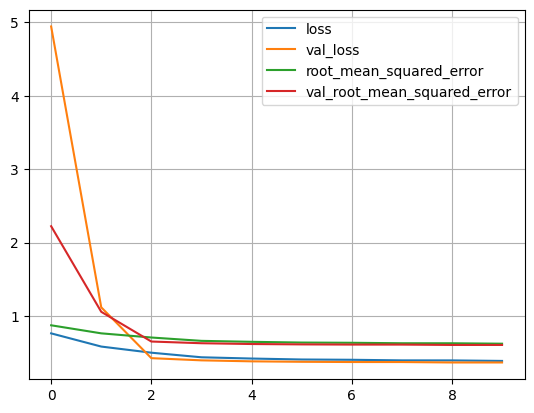

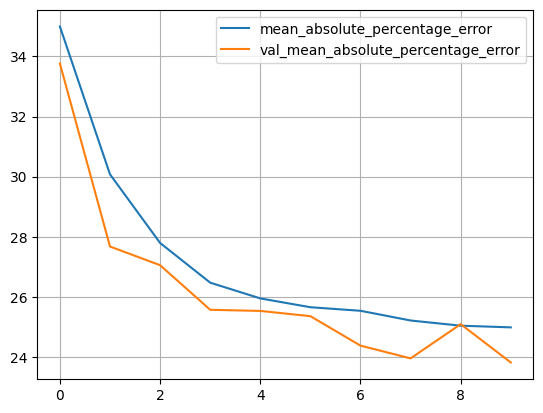

In [9]:
#Graficar el historial de entrenamiento
dfHistory = pd.DataFrame (history.history)
dfHistory [['loss', 'val_loss', 'root_mean_squared_error',
            'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error',
           'val_mean_absolute_percentage_error']].plot(grid=True)


In [10]:

#Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE =model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

#Evaluar el modelo en el conjunto de validacion
loss, RMSE, MAPE =model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid:", loss)
print("root_mean_squared_error valid:", RMSE)
print("mean_absolute_percentage_error valid:", MAPE)

#Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE =model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)



363/363 [==============================] - 1s 2ms/step - loss: 0.3866 - root_mean_squared_error: 0.6218 - mean_absolute_percentage_error: 23.9604
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.38657331466674805
root_mean_squared_error train: 0.6217501759529114
mean_absolute_percentage_error train: 23.96039581298828
121/121 [==============================] - 0s 2ms/step - loss: 0.3678 - root_mean_squared_error: 0.6065 - mean_absolute_percentage_error: 23.8157
Evaluar el modelo en el conjunto de validación
loss valid: 0.36779308319091797
root_mean_squared_error valid: 0.6064594388008118
mean_absolute_percentage_error valid: 23.815692901611328
162/162 [==============================] - 1s 3ms/step - loss: 0.3942 - root_mean_squared_error: 0.6278 - mean_absolute_percentage_error: 25.0484
Evaluar el modelo en el conjunto de prueba
loss test: 0.3941565752029419
root_mean_squared_error test: 0.6278188824653625
mean_absolute_percentage_error test: 25.048362731933594


In [13]:
#Entrenar el modelo
history =model.fit(X_train, y_train,
                   epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3477 - root_mean_squared_error: 0.5897 - mean_absolute_percentage_error: 23.3074 - val_loss: 0.3445 - val_root_mean_squared_error: 0.5870 - val_mean_absolute_percentage_error: 23.5807
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3464 - root_mean_squared_error: 0.5886 - mean_absolute_percentage_error: 23.2784 - val_loss: 0.3409 - val_root_mean_squared_error: 0.5839 - val_mean_absolute_percentage_error: 23.5968
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3456 - root_mean_squared_error: 0.5878 - mean_absolute_percentage_error: 23.1893 - val_loss: 0.3345 - val_root_mean_squared_error: 0.5783 - val_mean_absolute_percentage_error: 23.0548
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3442 - root_mean_squared_error: 0.5867 - mean_absolute_percentage_error: 23.1168 - val_loss: 0.3311 - val_root_mean_squared_error: 0.5754 - val_

<Axes: >

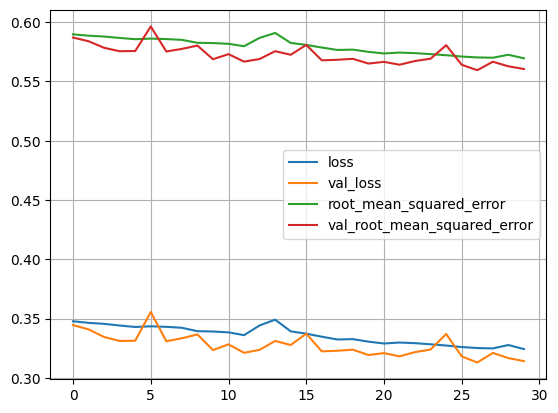

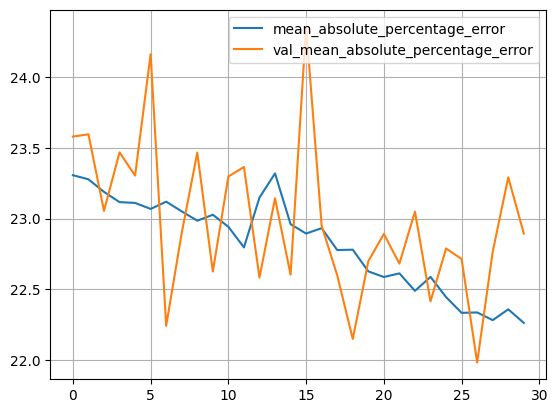

In [14]:
#Graficar el historial de entrenamiento
dfHistory = pd.DataFrame (history.history)
dfHistory [['loss', 'val_loss', 'root_mean_squared_error',
            'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error',
           'val_mean_absolute_percentage_error']].plot(grid=True)


# Respuestas
¿Qué conjunto de datos se utiliza en este código y qué problema de aprendizaje automático se aborda?

Rta.Es el conjunto de datos _california_housing, aborda el entrenamiento para predecir el precio de una casa en California. Este "dataset" tiene información para 10 variables (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value y ocean_proximity ) de 20.640 census block del estado de California, recopilada en el Censo de 1990.


¿Qué hace la función train_test_split() de scikit-learn y por qué se utiliza en este código?

Rta.La función `train_test_split()` de la biblioteca scikit-learn permite dividir datos en conjuntos de entrenamiento y prueba, lo cual es crucial para evaluar el rendimiento de un modelo con datos no vistos.


¿Por qué es importante estandarizar los datos antes de entrenar un modelo de redes neuronales?

Rta.Mejorar la eficiencia del entrenamiento, evitar el sesgo de características, mejora en la estabilidad numérica, facilita el aprendizaje de característica.


¿Qué arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?

Rta. La red neuronal tiene:
•	Una capa de entrada (input layer) definida implícitamente por la especificación de input_shape en la primera capa.
•	Una capa oculta (hidden layer) con 30 neuronas y activación ReLU.
•	Una capa de salida (output layer) con 1 neurona para la predicción de valores continuos.

¿Qué función de activación se utiliza en la capa oculta de la red neuronal y por qué se elige esa función?

Rta.La función ReLU

¿Qué función de pérdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluar su rendimiento?

Rta. La función de perdida es 'mean_squared_error' (MSE), y las métricas que se utilizan 'mean_absolute_percentage_error'


¿Cuántas épocas se utilizan para entrenar el modelo y por qué se elige ese número?

Rta. Se utilizan 10 épocas porque después de la primera época el val_loss se mantiene estable.
